In [1]:
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft,ifft,fftshift,ifftshift
import matplotlib.pyplot as plt
import sounddevice as sd
from statsmodels.tsa.ar_model import AutoReg

In [2]:
sample_rate,audio_data=wavfile.read("F:/4th year/8th Sem/EE599- Audio Engineering and Aocutics/Pitch_Detection/Audio_Files/sarigamapa.wav")
#audio_data=audio_data.T
print(audio_data.shape)
print(sample_rate)

(751464,)
44100


C:\Users\indiw\AppData\Local\Temp\ipykernel_2872\547788628.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate,audio_data=wavfile.read("F:/4th year/8th Sem/EE599- Audio Engineering and Aocutics/Pitch_Detection/Audio_Files/sarigamapa.wav")


In [37]:
window_size=int(sample_rate*0.1)
overlap_size = int(window_size*0.75)

audio_len = len(audio_data)


x = np.array([])
start = 0
n_windows = 0
while start < audio_len:
    end = start + window_size
    if end > audio_len:
        break
    x = np.append(x,audio_data[start:end])
    n_windows += 1
    start += window_size - overlap_size
x = x.reshape(n_windows, -1)
h = np.hamming(window_size)
x = x*h
print(x.shape)

(678, 4410)


In [38]:
lags = 40
a=np.array([])
for k in range(n_windows):
    ar_model=AutoReg(np.abs(x[k]),lags=lags).fit()
    a=np.append(a,ar_model.params)
a=a.reshape(n_windows,-1)
a=np.concatenate((np.ones(n_windows).reshape(n_windows,1),a[:,1::]),axis=1)
a.shape


(678, 33)

In [39]:
poles=np.array([])
for k in range(n_windows):
    poles=np.append(poles,np.roots(a[k]))
poles=poles.reshape(n_windows,-1)
poles.shape

(678, 32)

In [40]:
f=np.angle(poles)/(2*np.pi)
amp=np.abs(poles)
pitch = np.ones(n_windows)
for k in range(n_windows):
    ii=np.argsort(f[k])
    fr=f[k][ii]*(sample_rate/2)
    amp_r=amp[k][ii]
    jj=np.where((fr>0)&(fr<1000))
    #print(fr[jj])
    fr=fr[jj]
    #amp_r=amp_r[jj]
    print(fr)
    pitch[k] = fr[0]

[654.69455682]
[351.47347432]
[299.25280704 936.6077467 ]
[255.25520946 872.73937202]
[718.17883033]
[694.05038412]
[753.97396797]
[374.6213957  954.47579158]
[346.66249026 986.71343899]
[334.68038811 995.17819471]
[334.77856148 999.27066839]
[334.63977736 998.21463233]
[327.50239917 984.41628248]
[323.01470545 969.98111174]
[326.95679251 947.87465381]
[348.60910071 966.29740425]
[356.55158146 989.94441283]
[355.44060729 995.40970342]
[348.18690896 995.58676402]
[350.68993421]
[350.23366503]
[344.28052228]
[345.22619568]
[356.27648131]
[358.51917181]
[351.56821145]
[354.3624925  995.28045874]
[351.94782852 996.52127302]
[345.00055036]
[339.1885582  995.95685474]
[338.55153576 995.43237785]
[338.74100138 992.21281732]
[346.51038069 994.04054645]
[351.64800804]
[345.34632786 998.81914832]
[344.19041173 990.80542077]
[350.95682783 993.78852686]
[357.78647678]
[353.14892356]
[346.67254076]
[343.89928405]
[341.62771649]
[345.1288553]
[354.36599441]
[353.50647409]
[362.36924592]
[361.4644753

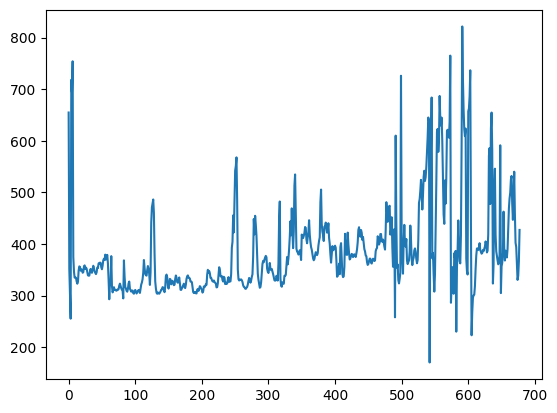

In [41]:
plt.plot(pitch)

Text(0, 0.5, 'Estimated Pitch (Hz)')

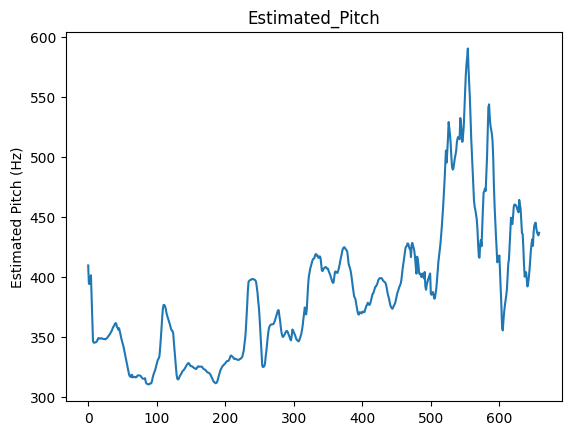

In [46]:
def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

result = moving_average(pitch, 20)
plt.plot(result)
plt.title('Estimated_Pitch')
plt.ylabel('Estimated Pitch (Hz)')